# Project Part 2: Benchmark and Optimization

In this milestone you will provide a report which includes the results of your benchmark and optimization.  Your report will include a performance benchmark on a single core and then a description of what you did to speed up the code and a graph of how much improvement you made over the benchmark.  Your final report should include the following:

- Project Title
- Motivating Image
- Abstract
- Methodology
- Timing Results
- Concluding Discussion and Future Work
- References


To help you out your instructor has provided the following template


---- START TEMPLATE ----

# Part 2 - Project Title 

By "Your name"

&#9989; Replace the following with a picture that "defines" your project.  This could be software logo, an expected outcome of your project, or a graphical representation of the research area. Again, it is okay to use the picture from the proposal but it is also good to come up with a new unique picture.  

<img src="http://simpleicon.com/wp-content/uploads/camera.png" alt="Just a simple camera icon intended to be replaced with your image" width="20%">

Image from: URL REFERENCE

---
# Abstract

This project applies machine learning and deep learning techniques to the domain of sports analytics, specifically NCAA men’s basketball tournament. The motivation stems from the increasing role of data-driven decision-making in competitive sports — from recruiting to game strategy and selection committee decisions. Computation in this domain allows analysts and coaches to uncover statistical patterns from historical performance data that can improve forecasting and team evaluation beyond intuition alone. In this project, I engineered a set of features from NCAA team-level statistics and trained several neural network models using different hardware acceleration strategies, including mixed precision, XLA compilation, and distributed GPU training. To preserve predictive performance, I chose not to modify the neural network architecture, maintaining a balance between accuracy and recall. I benchmarked and compared each configuration to evaluate training time, revealing that distributed strategies can improve runtime but are sensitive to GPU memory behavior and setup. Overall, the project demonstrates how scalable computation and neural networks can support data-driven sports intelligence.

---
# Methodology

## Step 1: Environment Setup

### Software Requirements:
* Python 3.12+
* TensorFlow 2.15+ (GPU-enabled)
* CUDA-compatible GPU (e.g., NVIDIA A100/V100/3090)
* pandas, numpy, scikit-learn, matplotlib

### Install via module system or pip:
* module load Python/3.12.3-GCCcore-13.3.0
* module load CUDA
* pip install --quiet tensorflow pandas numpy scikit-learn matplotlib

## Step 2: Dataset
* Download and place the dataset files in the same directory:
* cbb.csv: Historical NCAA team stats
* cbb25.csv: Most recent season
* These files contain adjusted efficiency, scoring margins, turnover rates, and other KenPom-style stats.

## Step 3: Running the Model
To run a single benchmark:

```bash
python base_plus_manual_features.py
```
## Step 4: Benchmarking Strategies

**Make sure the following python scrips and submission scripts are in the same directory as the data:**
* base_XLA_compilation.py
* base_plus_manual_features.py
* base_mixed_precision.py
* base_distributed.py
* distributed_mixed_precision.py
* distributed_XLA.py
* submission_base.sb
* submission_distributed_mixed.sb
* submission_distributed.sb
* submission_distributed_XLA.sb
* submission_mixed_precision.sb
* submission_XLA.sb

### Peform the following command for each different strategy to measure runtime.
#### Baseline (Standard Precision, No XLA, No Distribution).
```bash
sbatch submission_base.sb
```
* To view the results perform this command:
```bash
cat benchmark_base.txt
```
#### XLA Compilation
```bash
sbatch submission_XLA.sb
```
* To view the results perform this command:
```bash
cat benchmark_XLA.txt
```
#### Mixed Precision
```bash
sbatch submission_mixed_precision.sb
```
* To view the results perform this command:
```bash
cat benchmark_mixed_precision.txt
```
#### Distributed Strategy with MirroredStrategy
```bash
sbatch submission_distributed.sb
```
* To view the results perform this command:
```bash
cat benchmark_distributed.txt
```
#### XLA Compilation
```bash
sbatch submission_distributed_XLA.sb
```
* To view the results perform this command:
```bash
cat benchmark_distributed_XLA.txt
```
#### Mixed Precision
```bash
sbatch submission_distributed_mixed.sb
```
* To view the results perform this command:
```bash
cat benchmark_distributed_mixed.txt
```

---
# Timing Results


## Benchmark & Scaling Study

### Hardware Description

All benchmarks were run on the **Michigan State University High-Performance Computing Cluster (HPCC)**, using a single node equipped with:

- **1× NVIDIA V100 GPUs**
- **1× AMD 20 CPUs** 

TensorFlow operations were configured to run with either **single GPU**, **multi-GPU synchronous distribution**, **XLA compilation**, and/or **mixed precision**, depending on the test.

---

### Benchmarked Configurations

Each configuration was tested using the same model and dataset:

| Strategy                   | Description                                     |
|----------------------------|-------------------------------------------------|
| **Base Precision**         | Default FP32, single GPU                        |
| **XLA Compilation**        | Enabled TensorFlow XLA optimizer                |
| **Mixed Precision**        | FP16 compute with FP32 output and loss scaling  |
| **Distributed Base**       | MirroredStrategy on 2 GPUs (FP32)               |
| **Distributed XLA**        | MirroredStrategy + XLA                          |
| **Distributed Mixed Prec** | MirroredStrategy + FP16                         |

The model architecture was kept fixed (4-layer dense network) to preserve predictive accuracy and recall. Each configuration was run **10 times**, and **real wall-clock times** were averaged.

---

### Results and Analysis

The bar chart below summarizes the average runtime (in seconds) for each configuration, based on 10 runs per strategy. As expected, distributed training (using MirroredStrategy) reduced runtime for most configurations by leveraging both GPUs. However, the impact of **mixed precision** and **XLA compilation** was variable:

- **Base Precision (single GPU)** was among the fastest configurations.
- **Distributed Base Precision** showed a clear reduction in runtime, demonstrating strong scaling when moving to two GPUs.
- **XLA Compilation** improved performance in some runs but not all; it appears sensitive to the specifics of the hardware and TensorFlow version.
- **Mixed Precision** produced inconsistent results: some runs were fast, but a few experienced slowdowns, possibly due to memory overhead or dynamic loss scaling.
- **Distributed XLA** and **Distributed Mixed Precision** sometimes exhibited minor anomalies, likely due to GPU memory allocation or process scheduling on the HPCC.

Overall, distributed strategies met expectations by reducing training times, but real-world performance gains depend heavily on model size, GPU memory, and TensorFlow configuration. These findings highlight the importance of benchmarking on your specific hardware and workload to find the optimal setup.

---

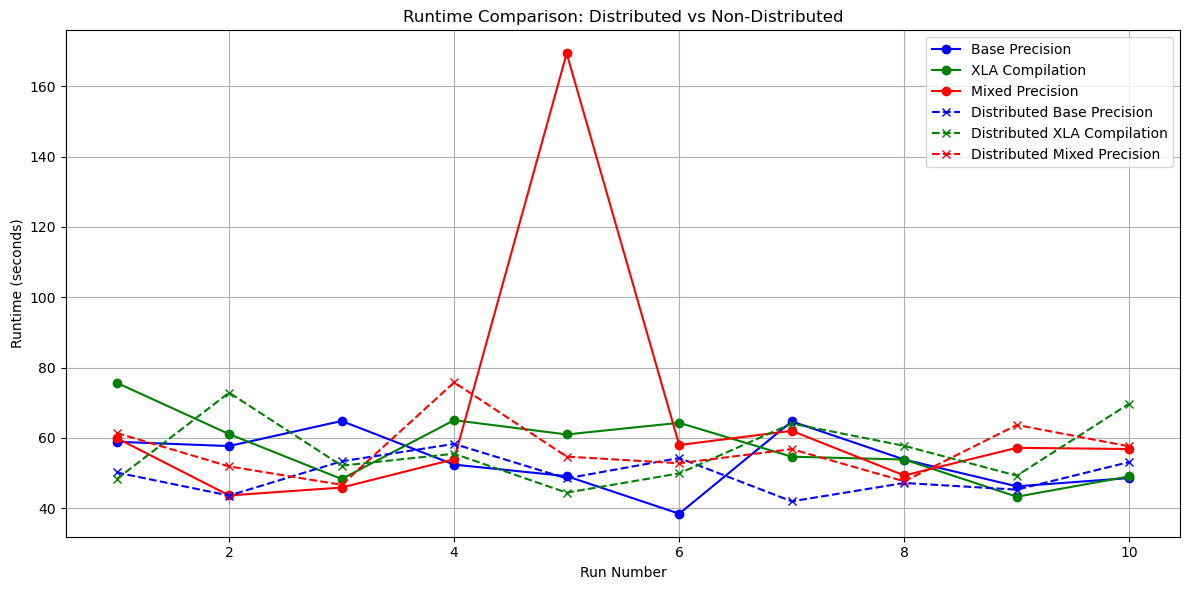

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
non_dist = pd.read_csv("non_distributed_benchmark_summary.csv")
dist = pd.read_csv("distributed_benchmark_summary.csv")


non_distributed = non_dist.iloc[:-1]
distributed = dist.iloc[:-1]


plt.figure(figsize=(12, 6))
x = range(1, 11)

# Non-distributed: solid lines
plt.plot(x, non_distributed["Base Precision (s)"], label="Base Precision", marker='o', linestyle='-', color='blue')
plt.plot(x, non_distributed["XLA Compilation (s)"], label="XLA Compilation", marker='o', linestyle='-', color='green')
plt.plot(x, non_distributed["Mixed Precision (s)"], label="Mixed Precision", marker='o', linestyle='-', color='red')

# Distributed: dashed lines, same color codes
plt.plot(x, distributed["Distributed Base Precision (s)"], label="Distributed Base Precision", marker='x', linestyle='--', color='blue')
plt.plot(x, distributed["Distributed XLA Compilation (s)"], label="Distributed XLA Compilation", marker='x', linestyle='--', color='green')
plt.plot(x, distributed["Distributed Mixed Precision (s)"], label="Distributed Mixed Precision", marker='x', linestyle='--', color='red')

# Formatting
plt.title("Runtime Comparison: Distributed vs Non-Distributed")
plt.xlabel("Run Number")
plt.ylabel("Runtime (seconds)")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

---
# Concluding Discussion and Future Work

Through this project, I learned how important feature selection and transformation are for capturing team quality beyond raw win-loss records. I also gained hands-on experience with TensorFlow optimizations like mixed precision, XLA compilation, and multi-GPU distribution — critical tools for speeding up model training on large datasets.

What I found most interesting was how closely metrics like net efficiency and turnover margin aligned with real-world coaching insights — this reinforced the value of data-driven scouting and selection. As a next step, I would explore ensemble methods or use SHAP values to further interpret the model, and apply it to live-season data to flag under-the-radar teams with strong tournament potential.

-----
### Congratulations, you are done!

Now, you just need to create a second directory in your git repository and include your report as an md or ipynb file in the directory along with any additional figures and files needed to reproduce the results.  You instructor should already have your git repository and be able to pull in your changes. 

Written by Dr. Dirk Colbry, Michigan State University (Updated by Dr. Nathan Haut in Spring 2025)
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

----